# Demo - Feature Engineering
Teknik teknik feature engineering yang sudah kita bahas di sesi kali ini termasuk:
- missing data imputation
- encoding
- scaling
- outlier handling
- cardinality
- tuning dengan gridsearchcv

Kita akan coba terapkan teknik teknik ini untuk membuat sebuah model machine learning.

## Case Study
kita gunakan data nbaallelo.csv data tentang permainan basket NBA untuk membuat ML model yang bisa memprediksi game_result

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# kita gunakan Support Vector Machine
from sklearn.svm import SVC

# encoding
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
# contoh pemakaian OrdinalEncoder ada di demo code sesi 12

# scaling
from sklearn.preprocessing import StandardScaler

# gridsearchcv
from sklearn.model_selection import GridSearchCV

In [2]:
# import data
df_nba = pd.read_csv("../dataset/nbaallelo.csv")
df_nba

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,68.013329,CLE,Cavaliers,91,1704.3949,1700.7391,H,W,0.765565,NaN
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,60.010067,GSW,Warriors,104,1809.9791,1813.6349,A,L,0.234435,NaN
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,59.290245,GSW,Warriors,105,1813.6349,1822.2881,H,L,0.481450,NaN


In [3]:
# explore data
df_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [4]:
# cek missing value
df_nba.isnull().sum()

gameorder             0
game_id               0
lg_id                 0
_iscopy               0
year_id               0
date_game             0
seasongame            0
is_playoffs           0
team_id               0
fran_id               0
pts                   0
elo_i                 0
elo_n                 0
win_equiv             0
opp_id                0
opp_fran              0
opp_pts               0
opp_elo_i             0
opp_elo_n             0
game_location         0
game_result           0
forecast              0
notes            120890
dtype: int64

In [5]:
df_nba['notes'].nunique()

231

In [6]:
df_nba['notes'].shape

(126314,)

In [7]:
len(df_nba['notes']) - df_nba['notes'].isnull().sum()

5424

dari 5424 data notes yang ada isinya, ada 231 unique values

<AxesSubplot:ylabel='Frequency'>

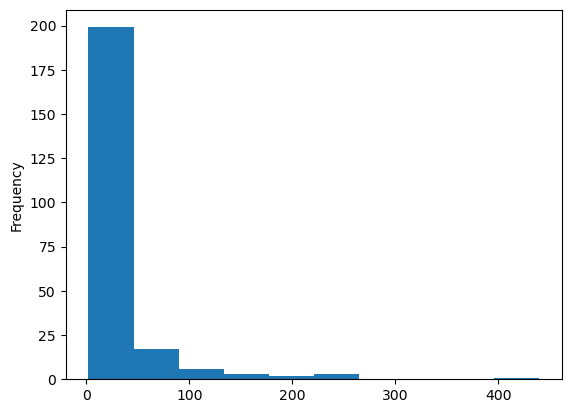

In [8]:
# cardinality - dari 231 unique values, masing2 muncul berapa kali? kita bisa gabungkan yang freq rendah jadi 1 kategori
df_nba['notes'].value_counts().plot(kind="hist")

note: histogram bisa dibuat lebih rapi dengan bantuan numpy

disini kita bisa pilih threshold nya, misalakan notes yang muncul 200x atau lebih jadi 1 kategori, yang freq dibawah 200 semua digabung menjadi notes lain "others" dengan begitu kita akan mengurangi cardinality kolom ini

In [9]:
notes_counts = pd.DataFrame(df_nba['notes'].value_counts())

notes_counts["new_note"] = notes_counts.index

# untuk baris data yang notes nya dibawah 200, kolom new note nya kita isi "others"
notes_counts.loc[notes_counts["notes"] < 200, "new_note"] = "others"

notes_counts

,notes,new_note
at New York NY,440,at New York NY
at Philadelphia PA,256,at Philadelphia PA
at Norfolk VA,240,at Norfolk VA
at Boston MA,232,at Boston MA
at Greensboro NC,218,at Greensboro NC
...,...,...
at Winnipeg Canada,2,others
at Lincoln HS in Phila. PA,2,others
at St. Paul MN,2,others
at Bangor ME,2,others


In [10]:
notes_counts["new_note"].nunique()

6

In [11]:
notes_counts["new_note"].value_counts()

others                226
at New York NY          1
at Philadelphia PA      1
at Norfolk VA           1
at Boston MA            1
at Greensboro NC        1
Name: new_note, dtype: int64

In [16]:
notes_yang_direplace = notes_counts[notes_counts["notes"] < 200].index
notes_yang_direplace

Index(['at Oakland CA', 'at Hampton VA', 'at Providence RI', 'at Charlotte NC',
       'at Omaha NE', 'at Hartford, CT', 'at Syracuse NY', 'at Detroit MI',
       'at St. Louis MO', 'at Cleveland OH',
       ...
       'at Lima OH', 'at Bakersfield CA',
       'Dolph Schayes of Syracuse scored a field goal for Boston',
       'at East Chicago IN', 'at Lacrosse WI', 'at Winnipeg Canada',
       'at Lincoln HS in Phila. PA', 'at St. Paul MN', 'at Bangor ME',
       'at The O2, London, England'],
      dtype='object', length=226)

In [12]:
df_nba["notes"]

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
126309    NaN
126310    NaN
126311    NaN
126312    NaN
126313    NaN
Name: notes, Length: 126314, dtype: object

In [18]:
df_nba["notes"] = df_nba["notes"].replace(notes_yang_direplace, 'others')
df_nba["notes"].value_counts()

others                4038
at New York NY         440
at Philadelphia PA     256
at Norfolk VA          240
at Boston MA           232
at Greensboro NC       218
Name: notes, dtype: int64

In [19]:
df_nba["notes"].nunique()

6

In [21]:
# missing data imputation - karena missing value di notes banyak, kita bisa pakai teknik arbitraty value
# kita isi yang missing notes dengan value "no notes"
df_nba.loc[df_nba["notes"].isnull(), "notes"] = "no notes"

df_nba["notes"].nunique()

7

In [22]:
df_nba["notes"].value_counts()

no notes              120890
others                  4038
at New York NY           440
at Philadelphia PA       256
at Norfolk VA            240
at Boston MA             232
at Greensboro NC         218
Name: notes, dtype: int64

In [23]:
df_nba["notes"].isnull().sum()

0

In [33]:
# encoding
enc = OneHotEncoder()

enc_result = pd.DataFrame(enc.fit_transform(df_nba[["notes"]]).toarray(), columns=enc.categories_)
enc_result

,at Boston MA,at Greensboro NC,at New York NY,at Norfolk VA,at Philadelphia PA,no notes,others
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
126309,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126310,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126311,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126312,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
enc.categories_

[array(['at Boston MA', 'at Greensboro NC', 'at New York NY',
        'at Norfolk VA', 'at Philadelphia PA', 'no notes', 'others'],
       dtype=object)]

In [36]:
# selanjutnya kita drop kolom notes, dan kita gantikan enc_result yang ada 7 kolom untuk merepresent notes tadi

df_nba2 = df_nba.drop(columns=['notes'])
df_nba2 = pd.concat([df_nba2, enc_result], axis=1)
df_nba2

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,game_location,game_result,forecast,"(at Boston MA,)","(at Greensboro NC,)","(at New York NY,)","(at Norfolk VA,)","(at Philadelphia PA,)","(no notes,)","(others,)"
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,H,L,0.640065,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,A,W,0.359935,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,H,W,0.631101,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,A,L,0.368899,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,H,L,0.640065,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126309,63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,...,H,L,0.546572,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126310,63156,201506140GSW,NBA,0,2015,6/14/2015,102,1,GSW,Warriors,...,H,W,0.765565,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126311,63156,201506140GSW,NBA,1,2015,6/14/2015,101,1,CLE,Cavaliers,...,A,L,0.234435,0.0,0.0,0.0,0.0,0.0,1.0,0.0
126312,63157,201506170CLE,NBA,0,2015,6/16/2015,102,1,CLE,Cavaliers,...,H,L,0.481450,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [41]:
# outlier handling
# kita cek apakah data pts dan opp_pts apakah ada yg punya outlier

df_nba2.describe()

,gameorder,_iscopy,year_id,seasongame,is_playoffs,pts,elo_i,elo_n,win_equiv,opp_pts,opp_elo_i,opp_elo_n,forecast,"(at Boston MA,)","(at Greensboro NC,)","(at New York NY,)","(at Norfolk VA,)","(at Philadelphia PA,)","(no notes,)","(others,)"
count,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000,126314.000000
mean,31579.000000,0.500000,1988.200374,43.533733,0.063857,102.729982,1495.236055,1495.236055,41.707889,102.729982,1495.236055,1495.236055,0.500000,0.001837,0.001726,0.003483,0.001900,0.002027,0.957059,0.031968
std,18231.927643,0.500002,17.582309,25.375178,0.244499,14.814845,112.139945,112.461687,10.627332,14.814845,112.139945,112.461687,0.215252,0.042817,0.041508,0.058918,0.043548,0.044973,0.202724,0.175915
min,1.000000,0.000000,1947.000000,1.000000,0.000000,0.000000,1091.644500,1085.774400,10.152501,0.000000,1091.644500,1085.774400,0.020447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15790.000000,0.000000,1975.000000,22.000000,0.000000,93.000000,1417.237975,1416.994900,34.103035,93.000000,1417.237975,1416.994900,0.327989,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,31579.000000,0.500000,1990.000000,43.000000,0.000000,103.000000,1500.945550,1500.954400,42.113357,103.000000,1500.945550,1500.954400,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,47368.000000,1.000000,2003.000000,65.000000,0.000000,112.000000,1576.060000,1576.291625,49.635328,112.000000,1576.060000,1576.291625,0.672011,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,63157.000000,1.000000,2015.000000,108.000000,1.000000,186.000000,1853.104500,1853.104500,71.112038,186.000000,1853.104500,1853.104500,0.979553,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

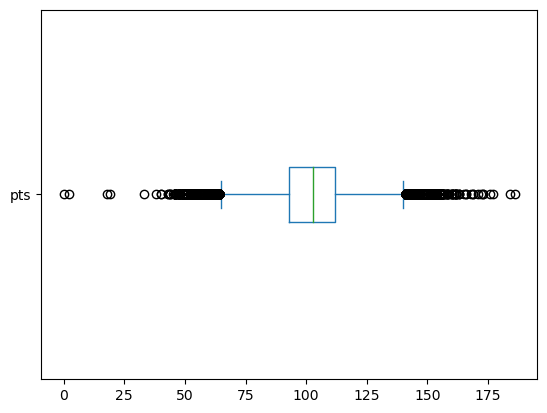

In [44]:
df_nba2["pts"].plot(kind="box", vert=False)

In [45]:
df_nba2[df_nba2["pts"] < 25]

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,game_location,game_result,forecast,"(at Boston MA,)","(at Greensboro NC,)","(at New York NY,)","(at Norfolk VA,)","(at Philadelphia PA,)","(no notes,)","(others,)"
3190,1596,195011220LAL,NBA,0,1951,11/22/1950,10,0,MNL,Lakers,...,H,L,0.826804,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3191,1596,195011220LAL,NBA,1,1951,11/22/1950,12,0,FTW,Pistons,...,A,W,0.173196,0.0,0.0,0.0,0.0,0.0,1.0,0.0
26684,13343,197210260VIR,ABA,1,1973,10/26/1972,7,0,DNR,Nuggets,...,A,L,0.328948,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26685,13343,197210260VIR,ABA,0,1973,10/26/1972,8,0,VIR,Squires,...,H,W,0.671052,0.0,0.0,0.0,0.0,0.0,0.0,1.0


data ini untuk setiap game ditulis 2 kali. A lawan B, B lawan A. di kolom iscopy dicatat apakah ini data game awal A lawan B atau versi copy nya B lawan A.

untuk outlier handling data ini, kita bisa menggunakan extreme outlier yang median +- 3* IQR

lalu kali ini kita mau gunakan teknik censoring/ capping, jadi data yang diatas upper limit menjadi max value `median + 3*IQR`, data di bawah lower limit menjadi min value `median - 3*IQR`

In [47]:
pts_stats = df_nba2["pts"].describe()
pts_stats

count    126314.000000
mean        102.729982
std          14.814845
min           0.000000
25%          93.000000
50%         103.000000
75%         112.000000
max         186.000000
Name: pts, dtype: float64

In [49]:
pts_median = pts_stats["50%"]
pts_IQR = pts_stats["75%"] - pts_stats["25%"]

pts_upper_limit = pts_median + 3 * pts_IQR
pts_lower_limit = pts_median - 3 * pts_IQR

print(pts_lower_limit, pts_upper_limit)

46.0 160.0


In [50]:
# ubah data awal, jadi tidak ada outlier
df_nba3 = df_nba2.copy()

df_nba3.loc[df_nba2["pts"] < pts_lower_limit, "pts"] = pts_lower_limit
df_nba3.loc[df_nba2["pts"] > pts_upper_limit, "pts"] = pts_upper_limit

df_nba3["pts"].describe()

count    126314.000000
mean        102.729919
std          14.800639
min          46.000000
25%          93.000000
50%         103.000000
75%         112.000000
max         160.000000
Name: pts, dtype: float64

<AxesSubplot:>

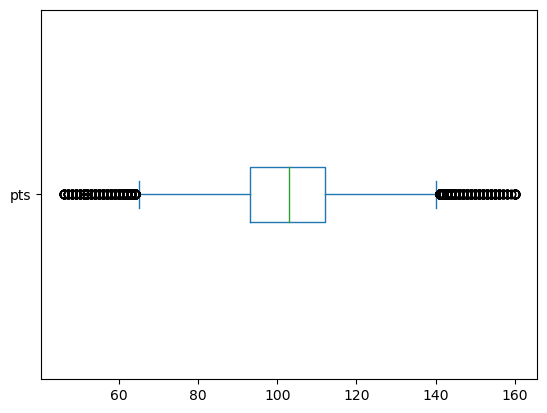

In [51]:
df_nba3["pts"].plot(kind="box", vert=False)